# Exploratory Data Analysis

* **Author:** Brian P. Josey
* **Date Created:** 2020-03-26
* **Date Modified:** 2020-03-27
* **Language:** Python 3.7.6

This notebook contains my exploratory data analysis (EDA) of two data sets that concern the COVID-19 pandemic. I intend to use this notebook to understand the structure of the data sets, determine which features are useful, and which I can neglect. I will also do a little feature engineering and plotting, but most of the plots and predictions will be saved for a different notebook.

The three data sets come from

* The European Centre for Disease Prevention and Control (ECDC). The data takes the form of a CSV file that organizes the number of cases at the national level for every day since 2019-12-31 for most nations. The ECDC data may be downloaded directly from [the organization](https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide).
* Johns Hopkins University Center for System Science and Engineering (JHU). The data also takes the form of a CSV files that are published daily. In addition to organizing the data at a national level, they further organize the data at the sub-national level (*e.g.* state or province) and then at the county level for data from the United States.
* New York Times (NYT). I have been following NYT's excellent coverage of the coronavirus for a while, wishing that they would share their database, which they finally did on March 27. It can be [accessed on GitHub here](https://github.com/nytimes/covid-19-data).

A quick glance at the data suggests that the ECDC data will be very useful to compare how the cases evolve over time, while the JHU is more useful to look at data in the US. For this analysis, I am going to download the most recent data set directly to my computer, but I will build a webscrapper to automatically update the data in later steps. The NYT data, however, mixes the strengths of the other two datasets.

## ECDC data

After importing the essential packages and modules, I will explore the data from the ECDC, saved as **ECDC_data.csv**, first then move on to the JHU data, saved as **JHU_data.csv**.

In [1]:
# Import Essential Packages
import numpy as np
import pandas as pd
import missingno
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import data as a data frame dubbed "df"

ecdc_data = pd.read_csv("ECDC_data.csv")
ecdc_data.head(15)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryCode,popData2018
0,26-03-2020,26,3,2020,33,0,Afghanistan,AF,AFG,37172386.0
1,25-03-2020,25,3,2020,2,0,Afghanistan,AF,AFG,37172386.0
2,24-03-2020,24,3,2020,6,1,Afghanistan,AF,AFG,37172386.0
3,23-03-2020,23,3,2020,10,0,Afghanistan,AF,AFG,37172386.0
4,22-03-2020,22,3,2020,0,0,Afghanistan,AF,AFG,37172386.0
5,21-03-2020,21,3,2020,2,0,Afghanistan,AF,AFG,37172386.0
6,20-03-2020,20,3,2020,0,0,Afghanistan,AF,AFG,37172386.0
7,19-03-2020,19,3,2020,0,0,Afghanistan,AF,AFG,37172386.0
8,18-03-2020,18,3,2020,1,0,Afghanistan,AF,AFG,37172386.0
9,17-03-2020,17,3,2020,5,0,Afghanistan,AF,AFG,37172386.0


### Data Exploration-ECDC

The ECDC data is composed of ten columns, from left to right:

* **dateRep** (Type: Datetime MM-DD-YYYY): The date of the data reported in each row.
* **day** (Type: Datetime DD): Day of the month for the entry.
* **month** (Type: Datetime MM or M): Month for the entry.
* **cases** (Type: Integer): The number of new cases reported in that country for that day. (*See note*)
* **deaths** (Type: Integer): The number of new deaths reported in that country for thatt day. (*See note*)
* **countriesAndTterritories** (Type: String): The name of the country or territory.
* **geold** (Type: Sttring): The two letter code for the country or territory.
* **countryCode** (Type: String): The three letter code for the country or territory.
* **popData2018:** (Type: Float): The estimated population for the country or territory for 2018.

*Note*: The **cases** and **deaths** columns report the number of new confirmed cases and deaths, respectively, reported that day. This was not immediately clear from the first fifteen rows of the the data frame, but comparing the entries for my nation (USA) and comparing it to the headlines made this clear. It should also be noted that the population estimates in the **popData2018** column come from the World Bank.

From the header it is clear that a few of the columns are redundant. The names of the countries correspond with the two and three letter country codes. Likewise, the dates are split into their months and days, which the ECDC may have done to simplify feature engineering for some users. The country population is a two year old estimate and does not change with time to reflect the day-by-day changes in population.

In [3]:
# Descriptive statistics

print("New Confirmed Cases")
print(ecdc_data["cases"].describe())

print("\nNew Deaths")
print(ecdc_data["deaths"].describe())

ecdc_data.describe()

New Confirmed Cases
count     6931.000000
mean        67.480883
std        500.134120
min         -9.000000
25%          0.000000
50%          0.000000
75%          4.000000
max      15141.000000
Name: cases, dtype: float64

New Deaths
count    6931.000000
mean        3.022219
std        29.871293
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       795.000000
Name: deaths, dtype: float64


,day,month,year,cases,deaths,popData2018
count,6931.000000,6931.000000,6931.000000,6931.000000,6931.000000,6.724000e+03
mean,16.229116,2.207329,2019.990333,67.480883,3.022219,7.498958e+07
std,8.148196,1.278249,0.097850,500.134120,29.871293,2.200959e+08
min,1.000000,1.000000,2019.000000,-9.000000,0.000000,3.371800e+04
25%,10.000000,1.000000,2020.000000,0.000000,0.000000,4.829483e+06
50%,17.000000,2.000000,2020.000000,0.000000,0.000000,1.112318e+07
75%,23.000000,3.000000,2020.000000,4.000000,0.000000,5.163526e+07
max,31.000000,12.000000,2020.000000,15141.000000,795.000000,1.392730e+09


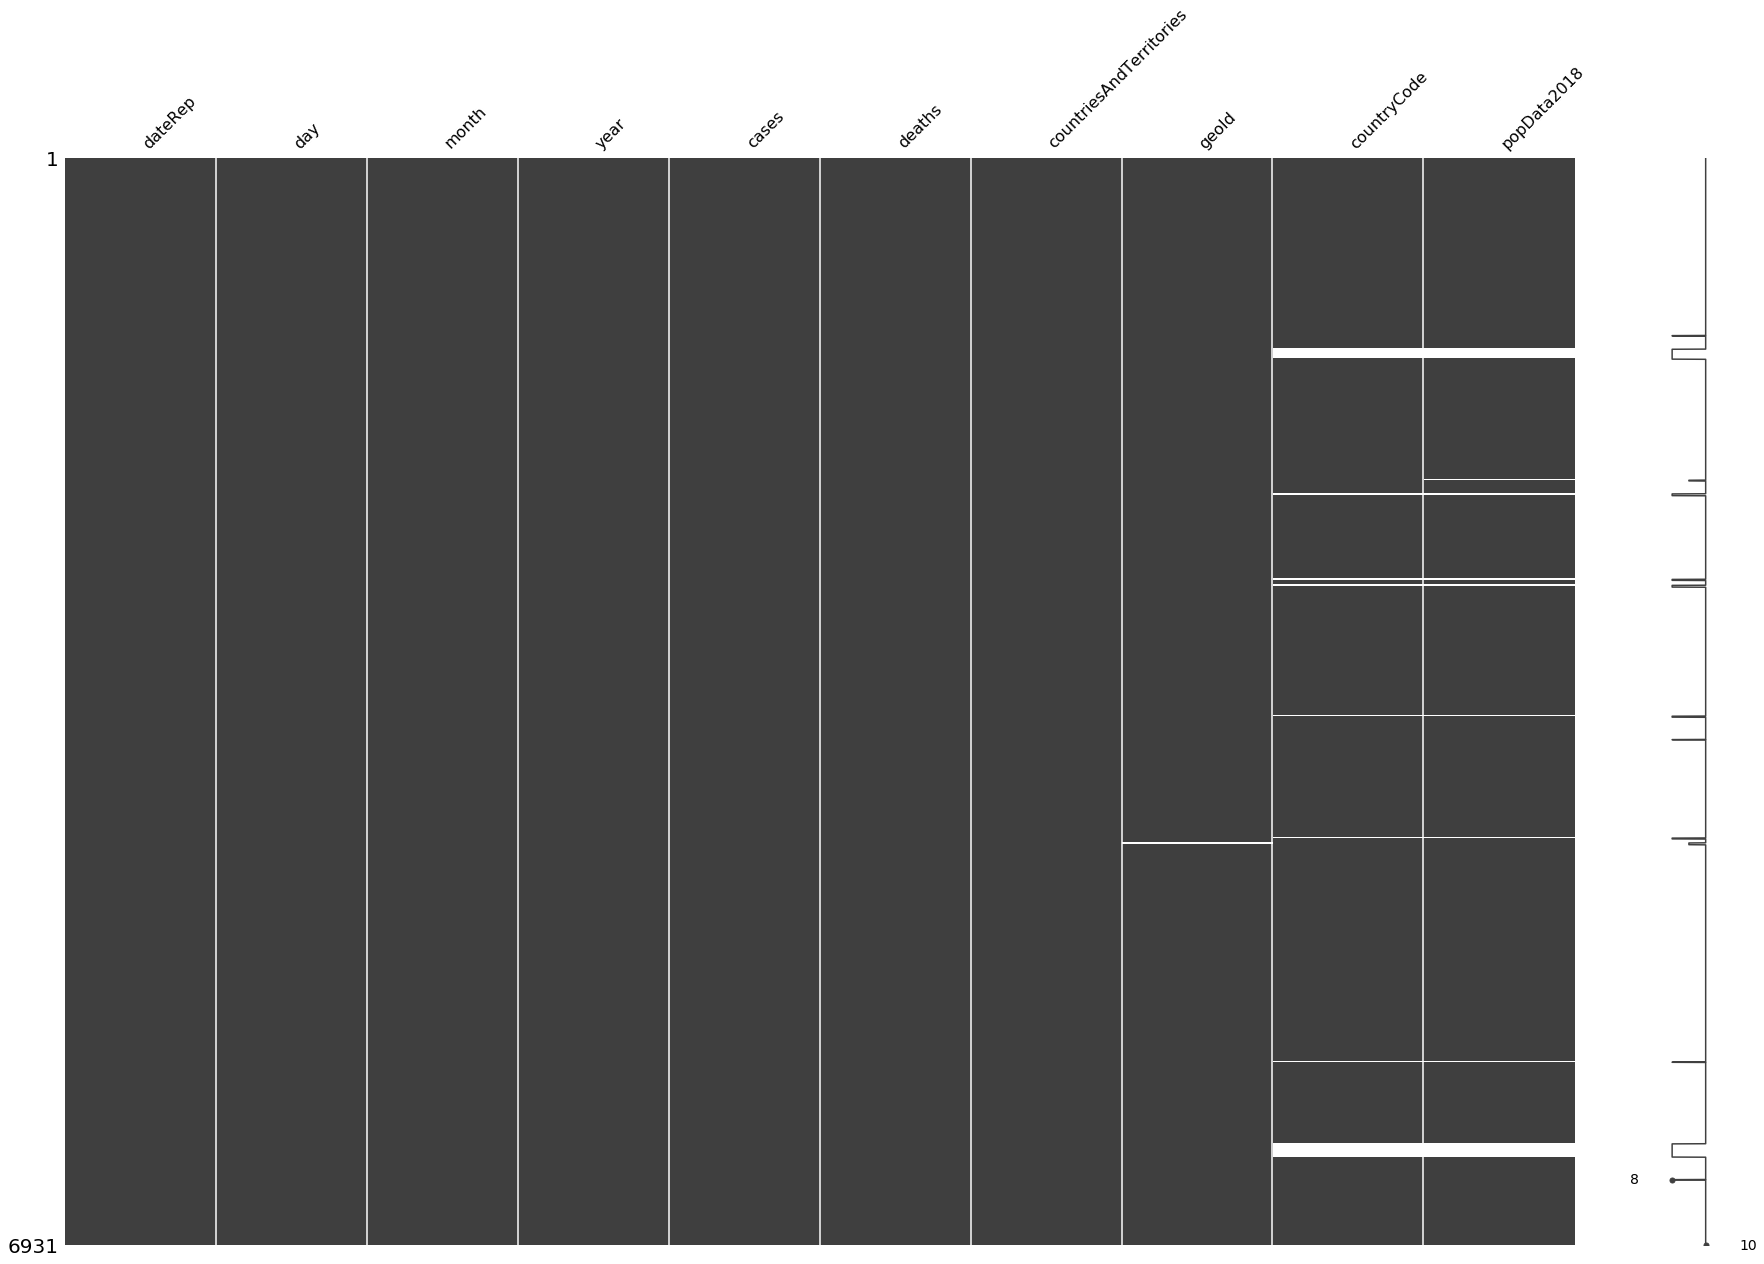

In [4]:
# Find Missing Data

missingno.matrix(ecdc_data, figsize = (30,20));

Some data is missing from the population and two and three letter country codes. I can work around this issue by sorting the data by the country/territory name.

## JHU Data

JHU publishes a CSV file once a day that contains the newly reported cases and deaths. This data is very useful for plotting the geographical spread because it breaks down the cases at the sub-national level for many contries (including China, Canada, and USA) and at the country-level for the United States. Unfortunately, the reports are just for the day, so a time-series analysis of the data will require a little more work. Before March 25, they hosted three CSV files (cases, deaths, and recoveries) that they appened with new data every night. I previously used this data to explore and project cases in the near future, but this update makes that analysis unusable. One goal I have for later is to bridge the gap between that analysis and the current data sets.

My analysis will use the raw data posted to GitHub. Every day, the date needs to be updated to the current data in ""MM-DD-YYYY" format. If the current date doesn't work, use the previous day's date because they have not updated the new data set.

In [7]:
# Import Data

CURRENT_DATE = "03-26-2020" # MM-DD-YYYY
JHU_DATA_URL ="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/%s.csv" %CURRENT_DATE

jhu_data=pd.read_csv(JHU_DATA_URL)
jhu_data.head(15)

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-03-26 23:48:35,34.223334,-82.461707,3,0,0,0,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-03-26 23:48:35,30.295065,-92.414197,3,0,0,0,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-03-26 23:48:35,37.767072,-75.632346,2,0,0,0,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-03-26 23:48:35,43.452658,-116.241552,39,0,0,0,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-03-26 23:48:35,41.330756,-94.471059,1,0,0,0,"Adair, Iowa, US"
5,21001.0,Adair,Kentucky,US,2020-03-26 23:48:35,37.104598,-85.281297,0,0,0,0,"Adair, Kentucky, US"
6,29001.0,Adair,Missouri,US,2020-03-26 23:48:35,40.190586,-92.600782,1,0,0,0,"Adair, Missouri, US"
7,40001.0,Adair,Oklahoma,US,2020-03-26 23:48:35,35.884942,-94.658593,2,0,0,0,"Adair, Oklahoma, US"
8,8001.0,Adams,Colorado,US,2020-03-26 23:48:35,39.874321,-104.336258,50,0,0,0,"Adams, Colorado, US"
9,16003.0,Adams,Idaho,US,2020-03-26 23:48:35,44.893336,-116.454525,0,0,0,0,"Adams, Idaho, US"


### Data Exploration-JHU

The JHU data is composed of twelve columns, from left to right:

* **FIPS** (Float): Unknown, may be a unique id that they use.
* **Admin2** (String): The name of the county for entries in the united states.
* **Province_State** (String): The name of the sub-national (*e.g.* state) part of the country.
* **Country_Region** (String): The name of the country or region represented by the row.
* **Last_Update** (Datetime, YYYY-MM-DD HH:MM:SS): Presumably the time the row was last updated.
* **Lat** (Float): The average latitude of the country or region, north of the equator is positive and south is negative.
* **Long_** (Float): The average longitude of the country or region, east of the prime meridian is positive and west is negative.
* **Confirmed** (Integer): The cummulative number of confirmed cases in the country or region regardless of type.
* **Deaths** (Integer): The cummulative number of deaths due to COVID-19.
* **Recovery** (Integer): The cummulative number of people that have recovered.
* **Active** (Integer): The number of currently active cases, given as: **Active** = **Confirmed** - **Deaths** - **Recovery**.
* **Combined_Key** (String): The full name of the region of interest, *e.g.* Denver, Colorado, USA.l

*Note*: By comparing the number of confirmed cases in individual rows to news reports I was able to confirm that the **Confirmed**, **Deaths**, and **Recovery** columns represent the *cummulative* total, unlike the ECDC data.

In [8]:
# Descriptive statistics

print("Cummulative Cases")
print(jhu_data["Confirmed"].describe())

print("\nCummulative Deaths")
print(jhu_data["Deaths"].describe())

print("\nCummulative Recoveries")
print(jhu_data["Recovered"].describe())


jhu_data.describe()

Cummulative Cases
count     3421.000000
mean       154.805905
std       2367.907472
min          0.000000
25%          0.000000
50%          1.000000
75%          6.000000
max      80589.000000
Name: Confirmed, dtype: float64

Cummulative Deaths
count    3421.000000
mean        7.006723
std       175.325474
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      8215.000000
Name: Deaths, dtype: float64

Cummulative Recoveries
count     3421.000000
mean        35.705934
std       1093.965862
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      61201.000000
Name: Recovered, dtype: float64


,FIPS,Lat,Long_,Confirmed,Deaths,Recovered,Active
count,3149.000000,3421.000000,3421.000000,3421.000000,3421.000000,3421.000000,3421.000000
mean,30473.904732,36.962857,-83.114307,154.805905,7.006723,35.705934,87.022800
std,15293.508578,9.920985,38.717963,2367.907472,175.325474,1093.965862,1595.873971
min,1001.000000,-42.882100,-170.132000,0.000000,0.000000,0.000000,-6.000000
25%,18181.000000,33.997804,-97.650203,0.000000,0.000000,0.000000,0.000000
50%,29183.000000,38.087062,-89.124676,1.000000,0.000000,0.000000,0.000000
75%,45089.000000,41.745840,-81.883993,6.000000,0.000000,0.000000,0.000000
max,99999.000000,71.706900,178.065000,80589.000000,8215.000000,61201.000000,62013.000000


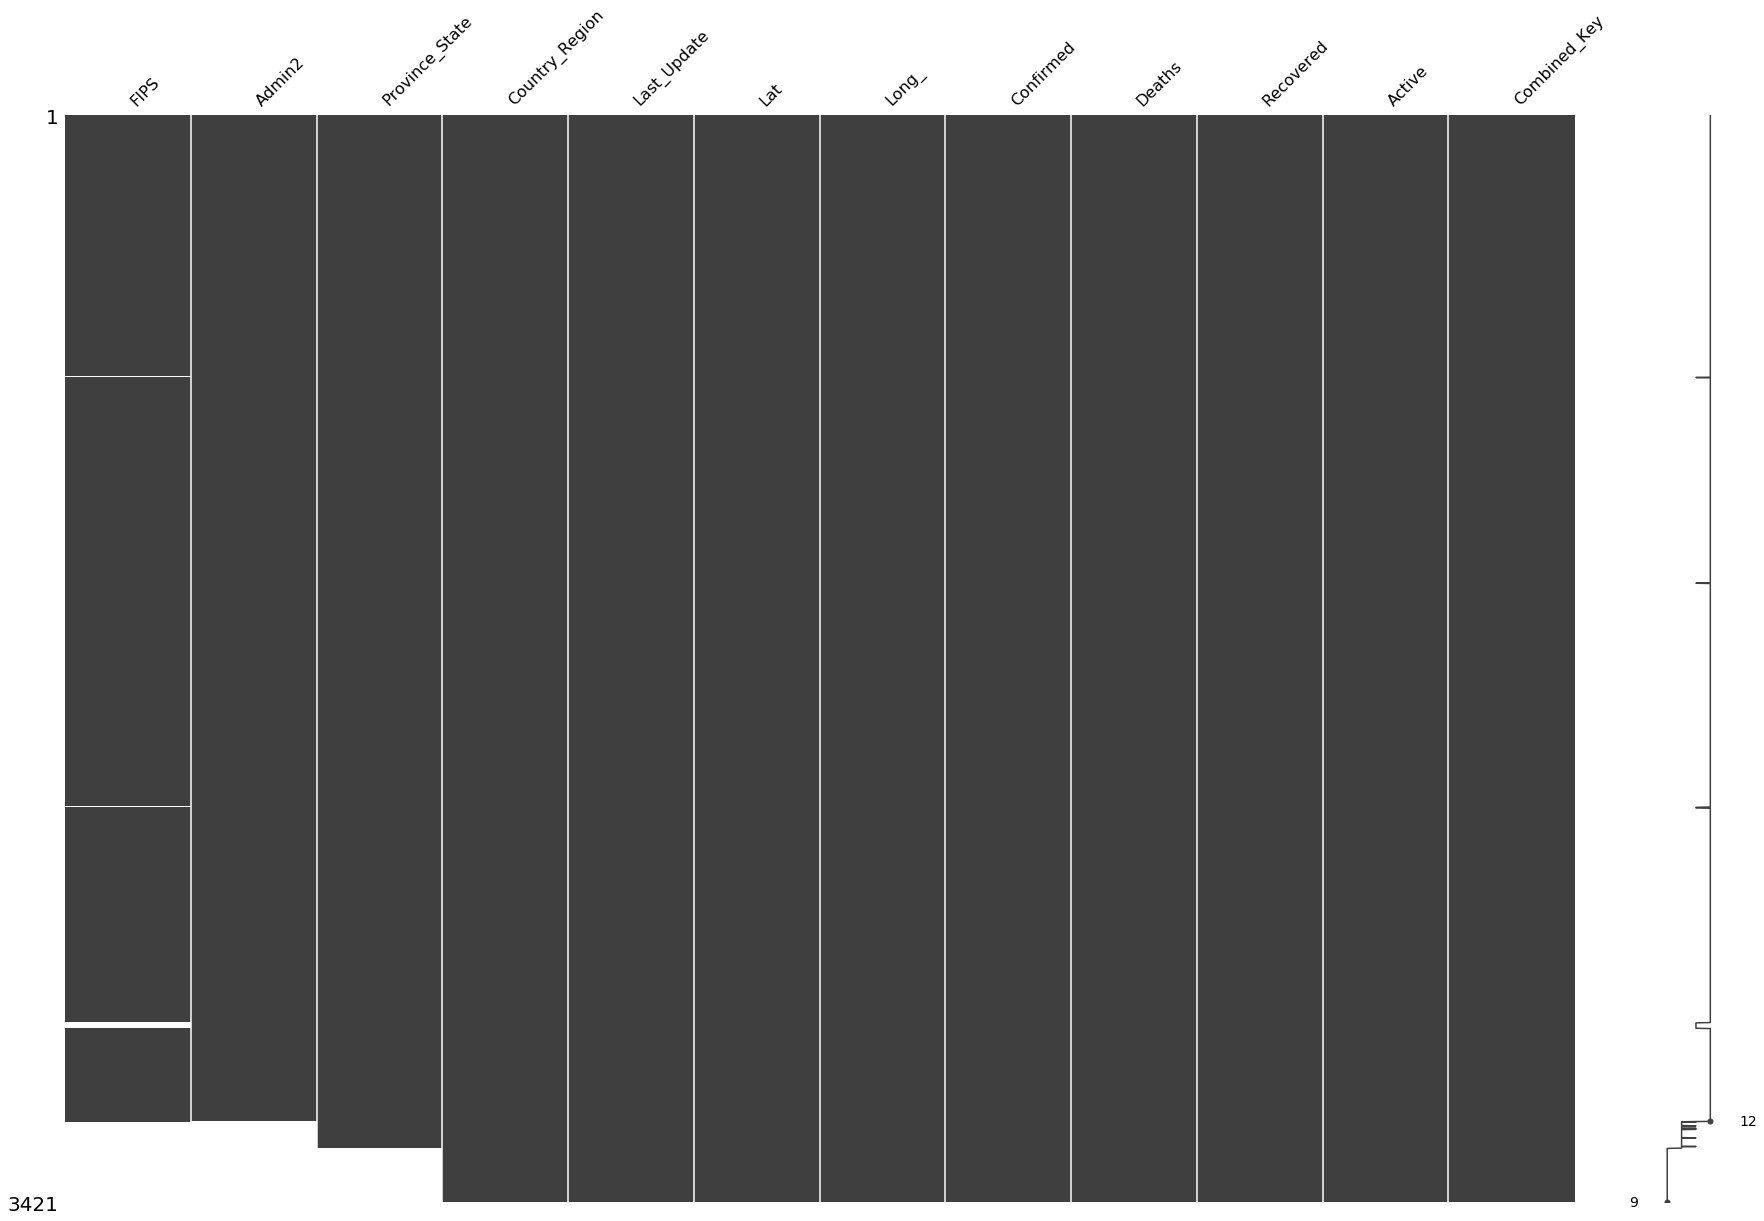

In [9]:
# Find Missing Data

missingno.matrix(jhu_data, figsize = (30,20));

It is clear that the **FIPS**, **Admin2**, and **Province_State** columns are all missing some values. Looking into it, the **FIPS** column is likely the "Federal Information Processing Standard," a NIST standard for how computers read and process regional information. The missing values under the **Admin2** and **Province_State** columns have both been addressed, some countries do not have states/provinces, and only the US data is split into counties.

## New York Times Data

The NYT data set is a CSV file that is updated as the newspaper learns of new cases. Their goal is to track every single case to see their outcomes, and allow researchers to have accurate data for their own research. The information can be scrapped directly from their GitHub account automatically. One weakness of the data set is that it only covers the United States (as of March 27).

In [10]:
# Import Data

NYT_STATE_URL = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv'
NYT_COUNTIES_URL = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv'

nyt_state_data = pd.read_csv(NYT_STATE_URL)
nyt_counties_data = pd.read_csv(NYT_COUNTIES_URL)

nyt_counties_data.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


### Data Exploration-NYT

The NYT data is split into two different CSV files: state-level data dubbed **nyt_state_data** and county-level data dubbed **nyt_counties_data**. Both data sets have the same structures with two notable differences: the county-level data has many more rows to represent the multiple counties per state, and it also has an additional column with the county name. The columns in the data sets are:

* **date** (Datetime, YYYY-MM-DD): The day the cases/deaths were reported.
* **county** (String): Name of the sub-state division (county, parish, independent city...).
* **state** (String): Name of the state.
* **fips** (Float): The Federal Information Processing Standards code defined under the JHU data exploration above.
* **cases** (Integer): The cummulative number of cases.
* **deaths** (Integer): The cummulative number of deaths.

Comparing the most up-to-date reports to the NYT's coverage makes it clear that the last two columns are the *cummulative* number of cases and deaths.

In [11]:
nyt_counties_data.describe()

,fips,cases,deaths
count,12218.000000,12377.000000,12377.000000
mean,28525.803077,23.382322,0.348792
std,15954.868213,292.004756,4.243110
min,1001.000000,1.000000,0.000000
25%,13223.000000,1.000000,0.000000
50%,28029.000000,2.000000,0.000000
75%,42037.000000,8.000000,0.000000
max,78999.000000,20011.000000,280.000000


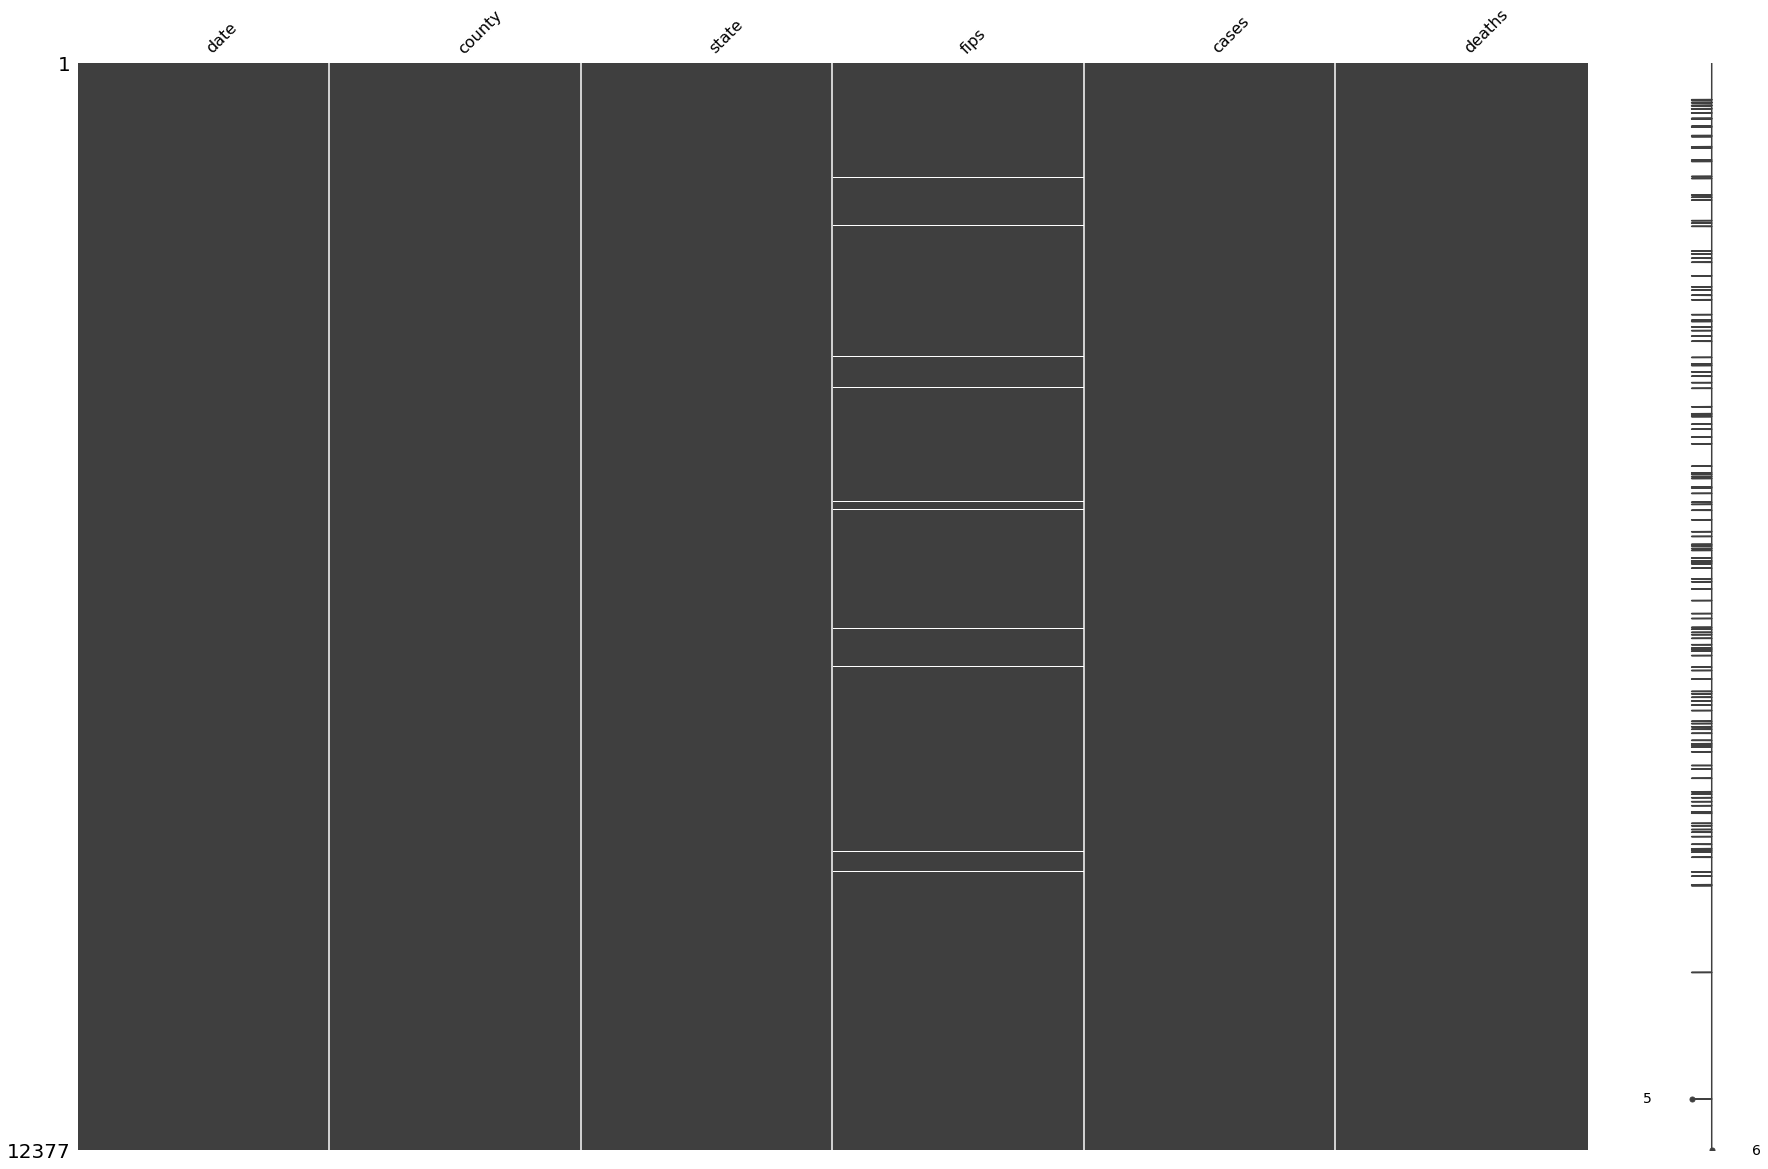

In [12]:
missingno.matrix(nyt_counties_data, figsize=(30,20));

# Some counties are missing fips.

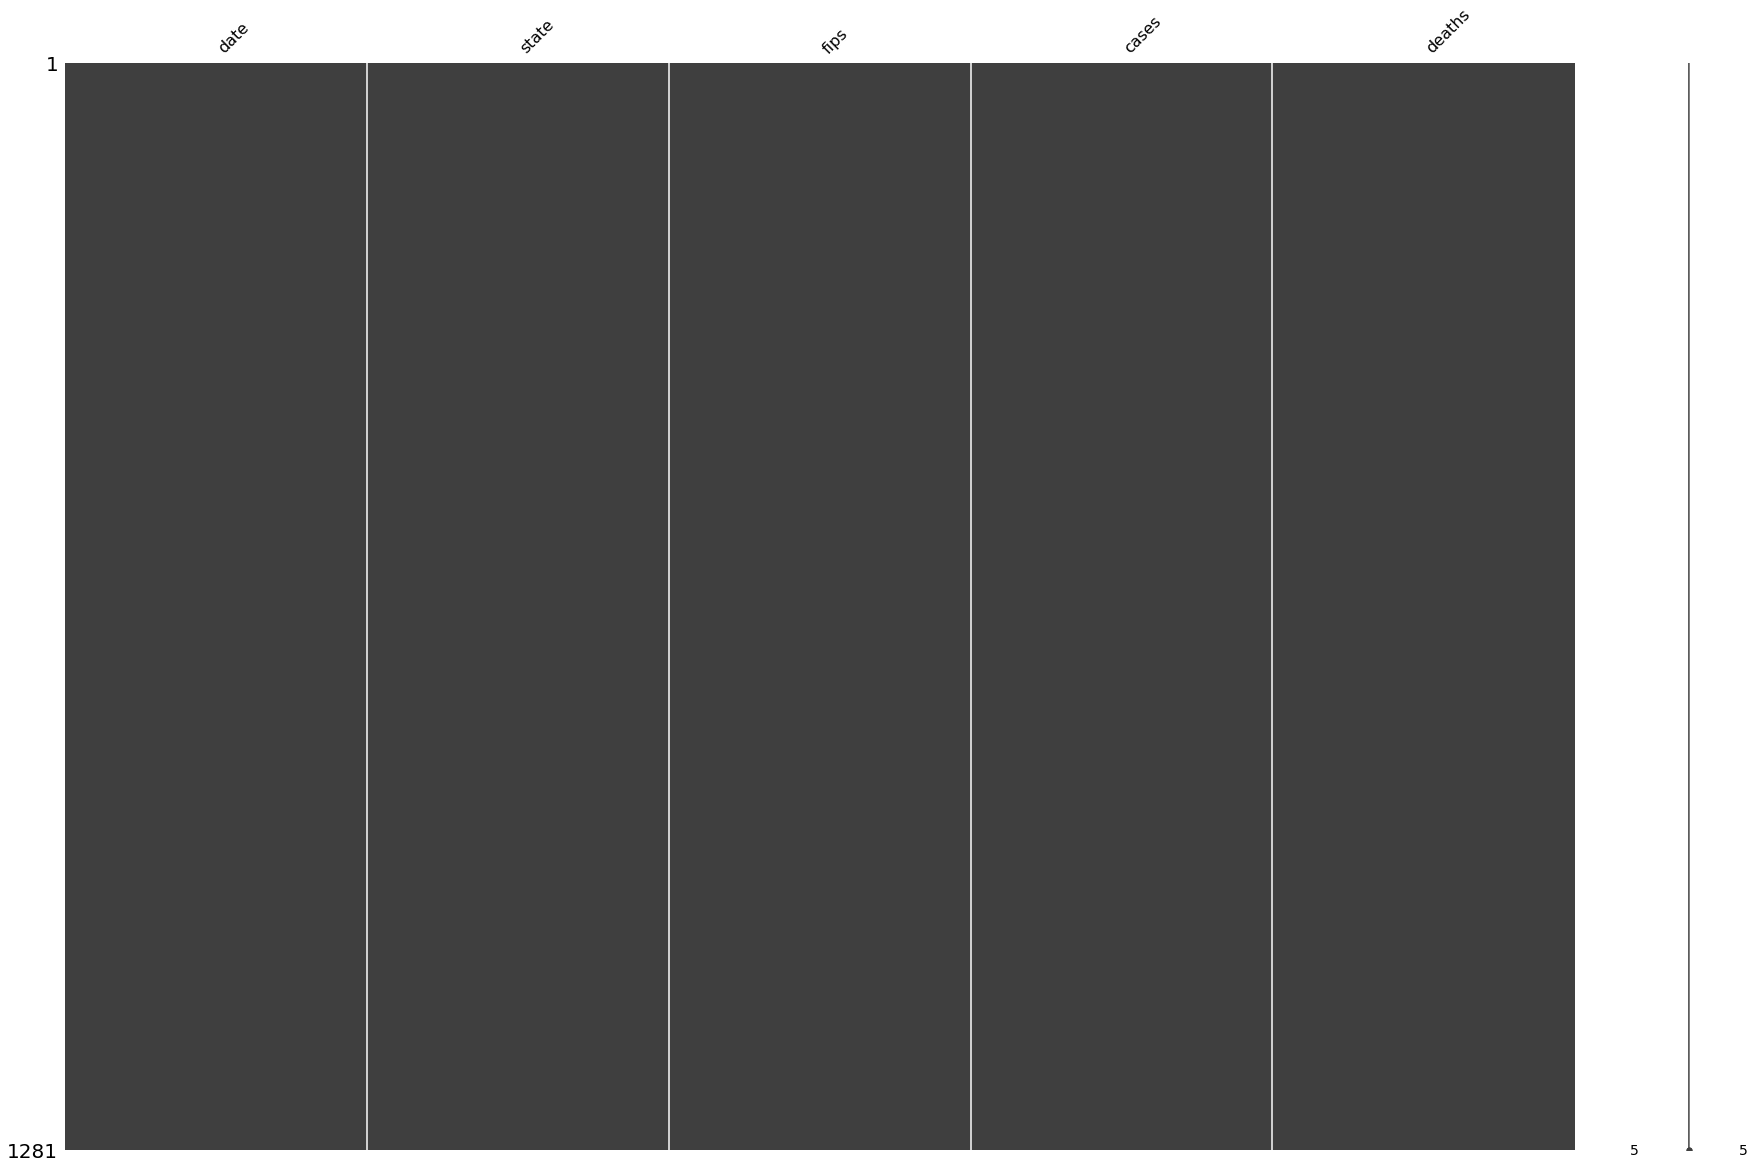

In [13]:
missingno.matrix(nyt_state_data, figsize=(30,20));

# There are no missing data in the state-level data sets.

In [14]:
# Zooming in on Washington State's data
washington_data = nyt_state_data.loc[nyt_state_data['state'] == 'Washington']
washington_data

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
4,2020-01-24,Washington,53,1,0
7,2020-01-25,Washington,53,1,0
...,...,...,...,...,...
1061,2020-03-21,Washington,53,1655,95
1115,2020-03-22,Washington,53,1844,97
1169,2020-03-23,Washington,53,2101,110
1223,2020-03-24,Washington,53,2469,123


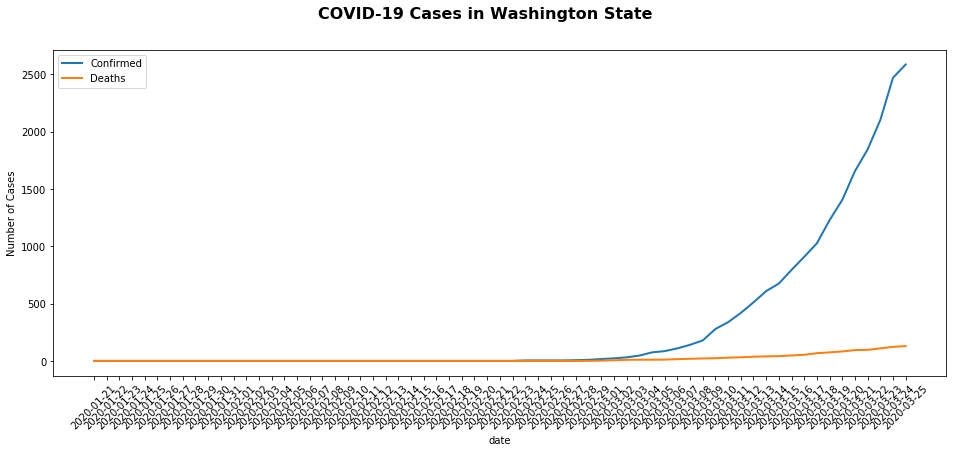

In [15]:
# Test Case-Washington (first state to report cases)

fig, ax = plt.subplots(figsize = (16,6))

sns.lineplot(x=washington_data['date'], y=washington_data['cases'], sort=False, linewidth = 2)
sns.lineplot(x=washington_data['date'], y=washington_data['deaths'], sort=False, linewidth = 2)

plt.suptitle("COVID-19 Cases in Washington State", fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.ylabel('Number of Cases')

ax.legend(['Confirmed', 'Deaths'])

plt.show()

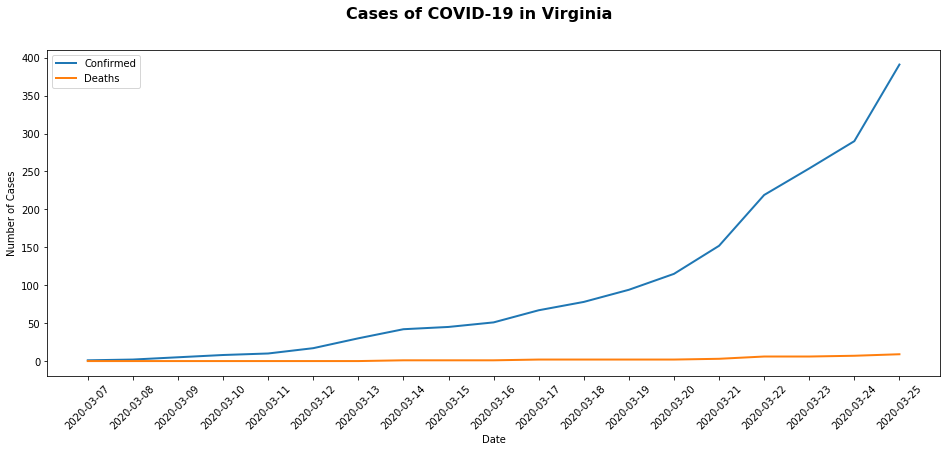

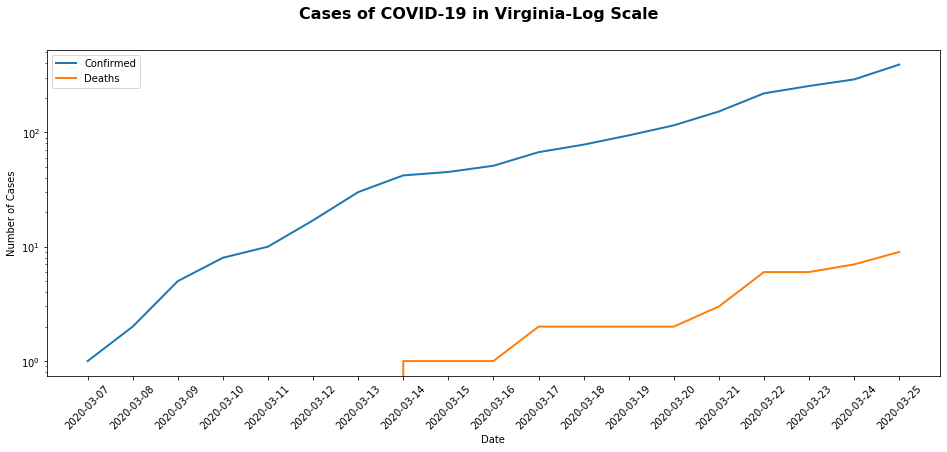

In [16]:
# Plot cases and death at state level
STATE = 'Virginia'

plot_data = nyt_state_data.loc[nyt_state_data['state'] == STATE]
plot_data

fig, ax = plt.subplots(figsize = (16,6))

sns.lineplot(x=plot_data['date'], y=plot_data['cases'], sort=False, linewidth = 2)
sns.lineplot(x=plot_data['date'], y=plot_data['deaths'], sort=False, linewidth = 2)

plt.suptitle(f"Cases of COVID-19 in {STATE}", fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Number of Cases')

ax.legend(['Confirmed', 'Deaths'])

plt.show()



fig,ax = plt.subplots(figsize=(16, 6))
ax.set(yscale="log")

sns.lineplot(x=plot_data['date'], y=plot_data['cases'], sort=False, linewidth = 2)
sns.lineplot(x=plot_data['date'], y=plot_data['deaths'], sort=False, linewidth = 2)

plt.suptitle(f"Cases of COVID-19 in {STATE}-Log Scale", fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Number of Cases')

ax.legend(['Confirmed', 'Deaths'])

plt.show()


In [17]:
state_data = nyt_state_data.groupby(['date', 'state'], sort=True).sum().reset_index()
state_data

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0
...,...,...,...,...,...
1276,2020-03-25,Virginia,51,391,9
1277,2020-03-25,Washington,53,2585,130
1278,2020-03-25,West Virginia,54,52,0
1279,2020-03-25,Wisconsin,55,623,7


In [18]:
# Look closely at some interesting states (big ones, fast change ones, and ones I care about)

data_WA = state_data[state_data['state'] == 'Washington']           # first cases
data_NY = state_data[state_data['state'] == 'New York']             # most cases
data_NM = state_data[state_data['state'] == 'New Mexico']           # home state
data_VA = state_data[state_data['state'] == 'Virginia']             # current state
data_DC = state_data[state_data['state'] == 'District of Columbia'] # literally see it out my window
data_MD = state_data[state_data['state'] == 'Maryland']             # ditto to DC
data_NJ = state_data[state_data['state'] == 'New Jersey']           # much of my family lives here
data_CO = state_data[state_data['state'] == 'Colorado']             # ditto to NJ


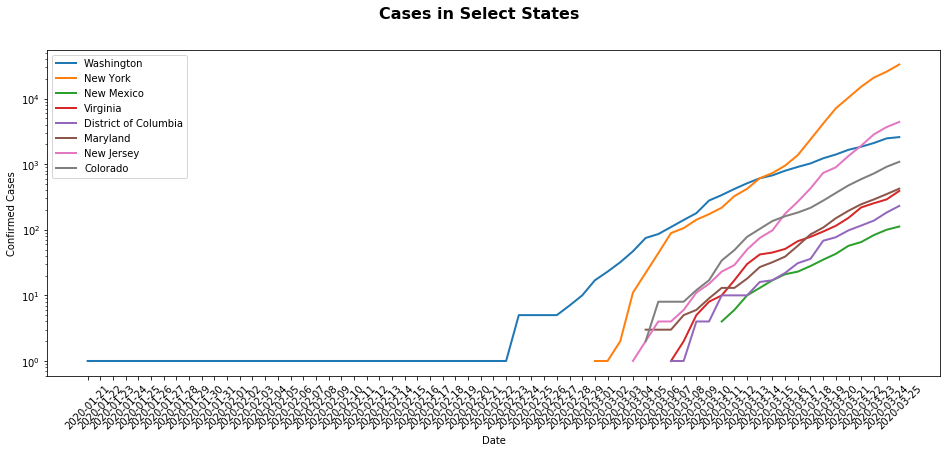

In [19]:
fig, ax = plt.subplots(figsize=(16,6))
ax.set(yscale="log")

sns.lineplot(x=data_WA['date'], y=data_WA['cases'],sort=False, linewidth=2, label='Washington')
sns.lineplot(x=data_NY['date'], y=data_NY['cases'],sort=False, linewidth=2, label='New York')
sns.lineplot(x=data_NM['date'], y=data_NM['cases'],sort=False, linewidth=2, label='New Mexico')
sns.lineplot(x=data_VA['date'], y=data_VA['cases'],sort=False, linewidth=2, label='Virginia')
sns.lineplot(x=data_DC['date'], y=data_DC['cases'],sort=False, linewidth=2, label='District of Columbia')
sns.lineplot(x=data_MD['date'], y=data_MD['cases'],sort=False, linewidth=2, label='Maryland')
sns.lineplot(x=data_NJ['date'], y=data_NJ['cases'],sort=False, linewidth=2, label='New Jersey')
sns.lineplot(x=data_CO['date'], y=data_CO['cases'],sort=False, linewidth=2, label='Colorado')


plt.suptitle("Cases in Select States", fontsize=16, fontweight='bold')

plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')

plt.show()

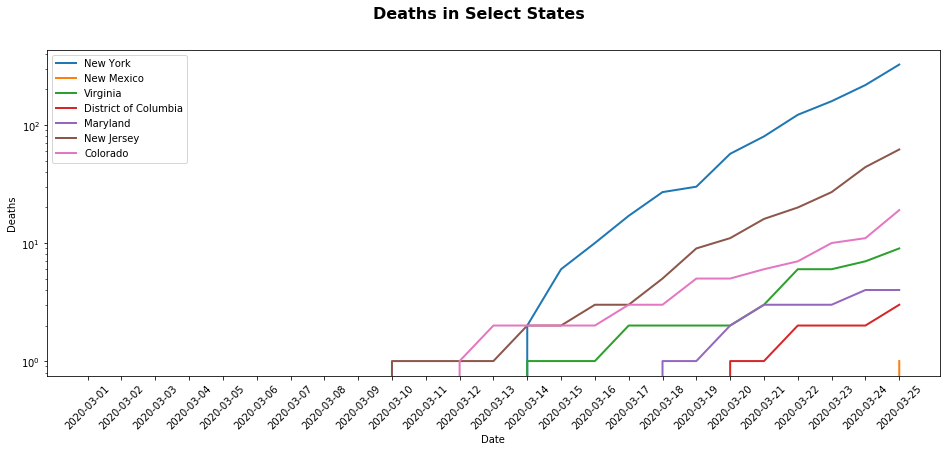

In [21]:
fig, ax = plt.subplots(figsize=(16,6))
ax.set(yscale="log")

#sns.lineplot(x=data_WA['date'], y=data_WA['deaths'],sort=False, linewidth=2, label='Washington')
sns.lineplot(x=data_NY['date'], y=data_NY['deaths'],sort=False, linewidth=2, label='New York')
sns.lineplot(x=data_NM['date'], y=data_NM['deaths'],sort=False, linewidth=2, label='New Mexico')
sns.lineplot(x=data_VA['date'], y=data_VA['deaths'],sort=False, linewidth=2, label='Virginia')
sns.lineplot(x=data_DC['date'], y=data_DC['deaths'],sort=False, linewidth=2, label='District of Columbia')
sns.lineplot(x=data_MD['date'], y=data_MD['deaths'],sort=False, linewidth=2, label='Maryland')
sns.lineplot(x=data_NJ['date'], y=data_NJ['deaths'],sort=False, linewidth=2, label='New Jersey')
sns.lineplot(x=data_CO['date'], y=data_CO['deaths'],sort=False, linewidth=2, label='Colorado')


plt.suptitle("Deaths in Select States", fontsize=16, fontweight='bold')

plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Deaths')

plt.show()

# Next Steps

Now that I have a good feel for the data, I will take a beak. Some things that I would like to do next are:

* Automate plotting the data so that I can easily call a couple of states and plot them.
* Create a way to exam the distribution of cases/deaths in a country broken down by its subnational division, and then states by their counties.
* Fit the curves of the cases to mathematical functions, *e.g.* logarithmic or exponential.
* Calculate the doubling rate.
* Model the system using known epidemiological models.
* Calculate the probabilities/confidence intervals of the fits.
* Compare various nations to each other.
* Clean up and simplify the abover writing.
* Simulate social distancing.